# Titanic

Observar detenidamente los siguientes gráficos. NO importa si no entienden el código con el que se generaron.
* ¿Qué conclusiones pueden extraer de ellos?
* ¿Cuáles utilizarían para justificar la validez o no de la siguiente afirmación: *En el Titanic, al momento de sobrevivir, era favorable viajar con un hijo/a*?

Opcionalmente, pueden usar como información *a priori* las siguientes conclusiones de análisis anteriores:
* Las mujeres tienen una probabilidad más alta de supervivencia que los hombres.
* Los bebes y niños (hasta 12 años) tienen una probabilidad más alta de supervivencia que los adolescentes, adultos y ancianos.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
### Carga de datos
df = pd.read_csv('DS_Clase_05_titanic.csv')

In [14]:
df.head(5)
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Nota:** en la variable *parch* (parent-child) del dataset está la información relativa a quienes viajaban con padres o hijos. En *sibsp* (sibling - spouse) quienes viajaban con hermanos o parejas.

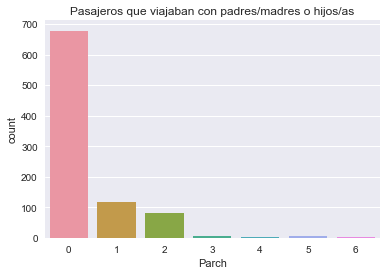

In [4]:
sns.countplot(df.Parch)
plt.title('Pasajeros que viajaban con padres/madres o hijos/as')
#plt.ylim([0,25])
plt.show()

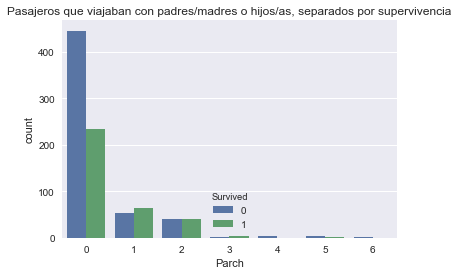

In [5]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por supervivencia')
plt.show()

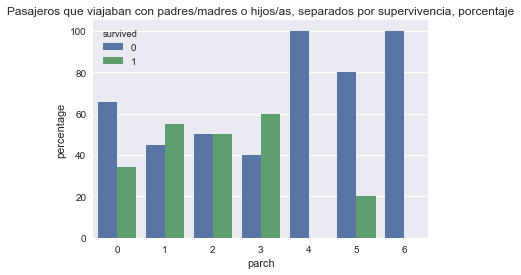

In [6]:
grouped = df.groupby(['Parch'])
parch_counts = grouped['Survived'].value_counts(normalize=True)
parch_data = [
    {'parch': parch, 'survived': survived, 'percentage': percentage*100} for 
    (parch, survived), percentage in dict(parch_counts).items()]

df_parch_data = pd.DataFrame(parch_data)

plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por supervivencia, porcentaje')
sns.barplot(x="parch", y="percentage", hue="survived", data=df_parch_data)
plt.show()

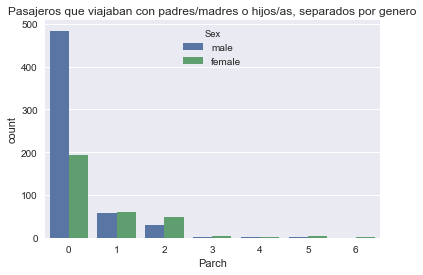

In [7]:
sns.countplot(x='Parch', hue='Sex', data=df, hue_order = ['male', 'female'])
plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por genero')
plt.show()

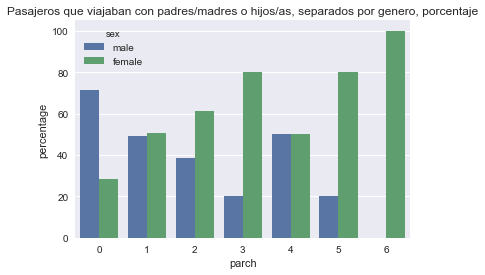

In [8]:
grouped = df.groupby(['Parch'])
parch_counts = grouped['Sex'].value_counts(normalize=True)
parch_data = [
    {'parch': parch, 'sex': sex, 'percentage': percentage*100} for 
    (parch, sex), percentage in dict(parch_counts).items()]

df_parch_data = pd.DataFrame(parch_data)

plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por genero, porcentaje')
sns.barplot(x="parch", y="percentage", hue="sex", data=df_parch_data)
plt.show()

Con la información que tienen hasta acá, ¿qué pueden decir acerca de la validez de la afirmación presentada?¿Qué gráficos les gustaría hacer para seguir explorando? No importa si no lo saben hacer, describirlo y explicar qué esperarían ver.

**Una vez que hayan hecho eso, correr la celda de abajo (cambiar False por True)**. ¡No lo hagan antes!

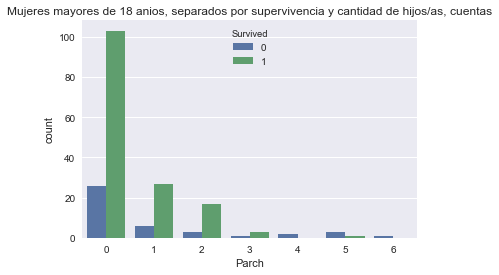

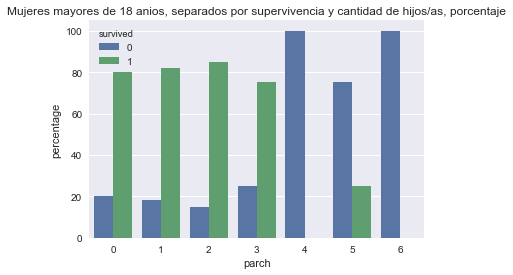

In [11]:
if True:
    ## Separamos del dataset aquellas mujeres mayores de 18 anios
    df_mujeres = df[df.Sex == 'female']
    df_mujeres_adultas = df_mujeres[df_mujeres.Age > 18]

    ##
    
    plt.title('Mujeres mayores de 18 anios, separados por supervivencia y cantidad de hijos/as, cuentas')
    sns.countplot(x="Parch", hue="Survived", data=df_mujeres_adultas)
    plt.show()
    
    
    grouped = df_mujeres_adultas.groupby(['Parch'])
    parch_counts = grouped['Survived'].value_counts(normalize=True)
    parch_data = [
        {'parch': parch, 'survived': survived, 'percentage': percentage*100} for 
        (parch, survived), percentage in dict(parch_counts).items()]

    df_parch_data = pd.DataFrame(parch_data)

    plt.title('Mujeres mayores de 18 anios, separados por supervivencia y cantidad de hijos/as, porcentaje')
    sns.barplot(x="parch", y="percentage", hue="survived", data=df_parch_data)
    plt.show()